# salesとmemberをDBで直接結合してcsvに書き出し


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)
#pd.set_option("display.max_rows", 200)

In [2]:
def make_shop_code(x):
    if len(x) == 8:
        return x[:-2]
    else:
        print("error!!")
def show_process(data_num, processed_data_num, count):

    if processed_data_num > data_num * 0.05 and count == 0:
        ini, h = 1, 1
    elif processed_data_num > data_num * 0.2 * count and count == 1:
        ini, h = 0, 1
    elif processed_data_num > data_num * 0.2 * count and count == 2:
        ini, h = 0, 1
    elif processed_data_num > data_num * 0.2 * count and count == 3:
        ini, h = 0, 1
    elif processed_data_num > data_num * 0.2 * count and count == 4:
        ini, h = 0, 1
    elif processed_data_num > data_num * 0.2 * count and count == 5:
        ini, h = 0, 1
    else:
        return 0
    if h == 1 and ini == 0:
        print("{}% is done...".format(20*count))
        return h
    elif h == 1 and ini == 1:
        print("5 % is done...")
        return h

In [156]:
import mysql.connector


config = { 'host' : '127.0.0.1',
           'user' : 'root',
           'password' : 'bm0lP2vryl75cPiu',
           'port' : 3335,
           'database' : 'master'}

class MySQL():
    def __init__(self, config):
        u"""
        :param config: 接続設定を格納した辞書
        """
        self.config = config
        self.conn = None
        if config is not None:
            self.connect()

    def connect(self, config=None):
        u"""
        MySQLに接続する。
        :return:
        """
        if config is None:
            config = self.config
        conn = mysql.connector.connect(**config)
        self.conn = conn
        return conn
mysql = MySQL(config)

In [5]:
sql_mem = """
        SELECT member_id, gender, birthday, pref_cd, zipcode FROM member LIMIT 1000
        """
df_member = pd.read_sql(sql_mem, mysql.conn)
df_member.iloc[100:105,:]

,member_id,gender,birthday,pref_cd,zipcode
100,10001881,2,19710116,13,1810013
101,10001907,2,19521120,10,3700701
102,10001956,1,19591122,13,1870044
103,10001964,2,19570429,14,2310851
104,10001972,2,19540905,14,2410801


In [120]:
sql_mem = """
        SELECT* FROM member LIMIT 1000
        """
df_member = pd.read_sql(sql_mem, mysql.conn)
print(df_member.dtypes)
df_member.tail()

member_id      object
status         object
gender         object
birthday       object
birthday_mm     int64
pref_cd        object
zipcode        object
expire_date    object
add_date       object
mod_date       object
dtype: object


,member_id,status,gender,birthday,birthday_mm,pref_cd,zipcode,expire_date,add_date,mod_date
995,10034346,1,1,19710804,8,09,3212345,20161223,20130228 060448,20170103 000002
996,10034353,1,1,19560208,2,11,3320012,20140314,20130223 060452,20160325 001446
997,10034361,1,2,19621201,12,08,3060226,20140210,20130219 105441,20160302 000935
998,10034379,1,2,19871021,10,14,2160003,20131222,20121224 061029,20160104 003344
999,10034387,1,2,19561207,12,13,1750083,20130907,20120909 060837,20150920 001230


In [58]:
sql_sales = """
            SELECT *
            FROM sales
            LIMIT 100
            """
df_sales = pd.read_sql(sql_sales, mysql.conn)
df_sales#.iloc[100:105,:]

,sales_date,sales_time,shop_id,part_no,color,size_id,unit_price,num_sales,sales_amount,list_price,cash_register_no,receipt_no,error_segment,member_id,create_date,create_time,create_seq
0,20150101,21:52,100003BV,BVA4408,01,M,2240,1,2240,6400,88,3635,2,00000000,20150103,12303,227508
1,20150101,21:52,100003BV,BVA7450,01,L,3250,1,3250,6500,88,3615,2,00000000,20150103,12303,227501
2,20150101,21:52,100003BV,BVC3486,25,M,1330,1,1330,3800,88,3487,2,00000000,20150103,12303,227486
3,20150101,21:52,100003BV,BVC3489,08,M,1470,1,1470,4200,88,3481,2,00000000,20150103,12303,227485
4,20150101,21:52,100003BV,BVC4413,01,S,1260,1,1260,4200,88,3617,2,00000000,20150103,12303,227504
5,20150101,21:57,100003BV,BVC4440,40,S,1645,1,1645,4700,89,0947,2,00000000,20150104,12232,211490
6,20150101,21:52,100003BV,BVE4452,31,M,1645,1,1645,4700,88,3501,2,00000000,20150103,12303,227490
7,20150101,21:52,100003BV,BVH4406,31,M,1330,1,1330,3800,88,3635,2,00000000,20150103,12303,227507
8,20150101,21:57,100003BV,BVH4406,31,M,1330,1,1330,3800,89,0947,2,00000000,20150104,12232,211489
9,20150101,21:52,100003BV,BVH4406,60,M,1140,1,1140,3800,88,3617,2,00000000,20150103,12303,227503


In [117]:
df_sales.dtypes

sales_date          object
sales_time          object
shop_id             object
part_no             object
color               object
size_id             object
unit_price           int64
num_sales            int64
sales_amount         int64
list_price           int64
cash_register_no    object
receipt_no          object
error_segment       object
member_id           object
create_date          int64
create_time          int64
create_seq           int64
dtype: object

In [45]:
sql_sales = """
            SELECT sales_date, member_id, part_no, color, size_id, unit_price, list_price, shop_id
            FROM sales
            WHERE member_id = "20081576"
            """
df_sales = pd.read_sql(sql_sales, mysql.conn)
df_sales#.iloc[100:105,:]

KeyboardInterrupt: 

In [160]:
df = df_new.drop_duplicates(['member_id', 'shop_id'])
df['shop_code'] = df.shop_id.apply(make_shop_code)

/home/t-matsui/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [161]:
df = df.loc[:, ['shop_code', 'member_id', 'shop_id', 'gender', 'birthday', 'pref_cd']]
df2 = pd.merge(df, df_shop, on='shop_code', how='inner')

In [279]:
df_examine = df2.loc[:,['member_id', 'shop_code', 'shop_name', 'pref_cd']].sort_values('pref_cd')

df = df_examine.query('pref_cd == "29"')
print(df.shape[0] * 100 /df_examine.shape[0])
df.groupby('shop_name').count().sort_values('member_id', ascending=False)
#df_examine.groupby('pref_cd').count().sort_values('member_id')
#print(df[df.shop_name.str.contains("金沢")].shape[0]/df.shape[0])
#df = df_examine.query('pref_cd == "12"')[df_examine.query('pref_cd == "12"').shop_name.str.contains("大宮")]
#print(df.shape[0] / df_examine.shape[0])
#df[df.shop_name.str.contains("柏")]

0.6610202827787995


,member_id,shop_code,pref_cd
shop_name,,,
なんばCITY アダム エ ロペ,249,249,249
なんばCITY ロペピクニック,221,221,221
天王寺MIO アダム エ ロペ,200,200,200
天王寺MIOプラザ館 ロペピクニック,159,159,159
大阪ルクア アダム エ ロペ,145,145,145
奈良 ロペ,143,143,143
あべのHoop サロン アダム エ ロペ,137,137,137
天王寺MIO VIS,134,134,134
大和高田オークタウン ロペ,130,130,130


In [169]:
import matplotlib.pyplot as plt
df_pref = df_examine.set_index('pref_cd')
df_pref

,member_id,shop_code,shop_name
pref_cd,,,
0,55335665,100695,二子玉川ライズ VIS
0,69511301,102092,大井町アトレ ロペピクニック
0,67818658,112795,池袋西武 ロペ
0,69511301,102091,大井町アトレ ViS
0,M0233959,205692,あべのHoop サロン アダム エ ロペ
0,44272805,108090,盛岡フェザン VIS／ロペピクニック
0,67843391,106391,名古屋ゲートウォーク ロペピクニック
0,72707722,106391,名古屋ゲートウォーク ロペピクニック
0,43122332,103698,池袋ルミネ VIS


In [318]:
sql_shop = """
SELECT * 
FROM shop
"""
df_shop_log = pd.read_sql(sql_shop, mysql.conn)
#df_shop_log.to_csv('jun_shop.csv')

In [322]:
df_shop = pd.read_csv('jun_shop.csv',
                      dtype={'biz_type': str, 'deal_class': str}).loc[:,['shop_code','sbrand_code', 'style_code', 'biz_type', 'deal_class']]
df_shop

,shop_code,sbrand_code,style_code,biz_type,deal_class
0,100000,BH,Z10,99,99
1,100000,BJ,Z10,99,99
2,100000,BP,Z10,99,99
3,100000,BV,Z10,99,99
4,100000,BX,Z10,99,99
5,100000,EK,Z10,99,99
6,100000,ER,Z10,99,99
7,100000,EU,Z10,99,99
8,100000,GA,Z10,99,99
9,100000,GC,Z10,99,99


In [146]:

print(df_shop.describe())
for i in range(df_shop.columns.shape[0] - 1):
    w = df_shop.columns[i]
    print(df_shop.columns[i])
    print(np.unique(df_shop.iloc[:,i].values))
df_shop.query('shop_name == ""')

       shop_code sbrand_code style_code biz_type deal_class shop_name
count       3263        3263       3263     3263       3263      3263
unique      2385          93         20        5          8      2396
top       100001          GD        Z01       01         01   知人売り：掛売
freq          21         320        916     1774       1654        48
shop_code
['100000' '100001' '100003' ..., '980008' '980009' '980010']
sbrand_code
['AA' 'AC' 'AJ' 'AN' 'AO' 'AQ' 'AT' 'BB' 'BC' 'BE' 'BF' 'BH' 'BJ' 'BO' 'BP'
 'BV' 'BW' 'BX' 'BY' 'CE' 'CG' 'CJ' 'CL' 'DD' 'EC' 'ED' 'EF' 'EG' 'EI' 'EK'
 'EN' 'EO' 'EQ' 'ER' 'ES' 'EU' 'FF' 'FL' 'FN' 'FS' 'GA' 'GC' 'GD' 'GE' 'GF'
 'GG' 'GH' 'GI' 'GK' 'GL' 'GM' 'GN' 'GR' 'GT' 'GU' 'GV' 'GW' 'GX' 'KM' 'LF'
 'LH' 'LS' 'NJ' 'OC' 'OL' 'OM' 'PB' 'PC' 'PG' 'PK' 'PO' 'PR' 'RC' 'RF' 'RJ'
 'RM' 'RO' 'RP' 'RR' 'RS' 'RZ' 'SF' 'SH' 'SK' 'TI' 'TS' 'UM' 'UT' 'ZP' 'ZR'
 'ZS' 'ZY' 'ZZ']
style_code
['' 'A01' 'A02' 'A03' 'A99' 'O01' 'V01' 'V02' 'V05' 'V07' 'V99' 'Z01' 'Z04'
 'Z05' 

,shop_code,sbrand_code,style_code,biz_type,deal_class,shop_name
2792,213090,GA,,,,


In [315]:
df_pref = pd.read_csv('jun_pref_table.csv', dtype={'pref_cd': str}).iloc[:,1:]
df_pref

,pref_cd,pref_name
0,01,北海道
1,02,青森
2,03,岩手
3,04,宮城
4,05,秋田
5,06,山形
6,07,福島
7,08,茨城
8,09,栃木
9,10,群馬


## ここから書き出し or 読み込み

sales
- sales_date          object
- sales_time          object
- shop_id             object
- part_no             object
- color               object
- size_id             object
- unit_price           int64
- num_sales            int64
- sales_amount         int64
- list_price           int64
- cash_register_no    object
- receipt_no          object
- error_segment       object
- member_id           object
- create_date          int64
- create_time          int64
- create_seq           int64

In [6]:
execute = False

EXTRACT_LOG = """
SELECT s.member_id, s.sales_date, s.shop_id, s.part_no, s.color, s.size_id, s.unit_price, s.num_sales, 
        s.sales_amount, s.list_price,m.gender, m.birthday, m.pref_cd, m.zipcode
FROM sales s
INNER JOIN (
    SELECT DISTINCT member_id, gender, birthday, pref_cd, zipcode
    FROM member
) m ON s.member_id = m.member_id
"""
if execute:
    df_log = pd.read_sql(EXTRACT_LOG, mysql.conn)
    print("yes")
    df_log.head(10)
else:
    print("no")

no


In [135]:
df_log.shape[0]

12203589

In [125]:
filename = 'jun_processed_data.csv'
#df_log.to_csv(filename)

In [8]:
save = False
import pandas as pd
import numpy as np
#import mysql.connector
import datetime
import os.path

filename = 'jun_processed_data.csv'
dtype_dict = {'member_id': str,'sales_date': str, 'shop_id': str,
              'part_no': str, 'color': str, 'size_id': str, 'unit_price': np.int64, 'num_sales': np.int64,
              'sales_amount': np.int64, 'list_price': np.int64, 'gender': str, 'birthday': str,
              'pref_cd': str, 'zipcode': str} 
if save:
    print("YOU SHOULD NOT WRITE IT DOWN. IT TAKES A LONG TIME.")
    df_log.to_csv(filename)
else:
    if os.path.isfile(filename):
        df_log = pd.read_csv(filename, dtype=dtype_dict).iloc[:,1:]
    else:
        print("YOU SHOULD NOT WRITE IT DOWN. IT TAKES A LONG TIME.")
        df_log.to_csv(filename)

In [11]:
df_log.tail()

,member_id,sales_date,shop_id,part_no,color,size_id,unit_price,num_sales,sales_amount,list_price,gender,birthday,pref_cd,zipcode
12203584,S1266369,20180131,285012BB,BNP2544,99,F,371,1,371,371,0,NaN,00,NaN
12203585,S1208007,20180131,285012BB,BNP2544,99,F,371,1,371,371,0,NaN,00,NaN
12203586,P4386228,20180131,296191FF,FLE5765,40,M,2450,1,2450,4900,0,NaN,00,NaN
12203587,J6389091,20180131,296192FF,FLK5757,10,M,1950,1,1950,3900,0,NaN,00,NaN
12203588,P4777087,20180131,296192FF,FLO7757,07,M,4900,1,4900,9800,0,NaN,00,NaN


2160377のデータ

In [8]:
print(len(df_log.dropna()))
df_log.dropna().sort_values('member_id').tail(10)

12203589


,member_id,sales_date,shop_id,part_no,color,size_id,unit_price,list_price,gender,birthday,pref_cd,zipcode
11575798,T4412802,20171209,116598EK,EKZ6797,11,F,1800,1800,0,,00,
1818830,T5982100,20150610,266095GD,GDS1566,27,36,3430,4900,0,,00,
1818795,T5982100,20150610,266095GD,GDC1548,08,38,3080,4400,0,,00,
1818834,T5982100,20150610,266095GD,GIX1550,60,F,2030,2900,0,,00,
1818805,T5982100,20150610,266095GD,GDH1552,44,38,2030,2900,0,,00,
7140757,T8470988,20161030,211790GG,GGE3611,40,38,16000,16000,0,,00,
2787949,T9168854,20150905,224794GG,GGK3501,40,M,14400,16000,0,,00,
2094644,Y5309345,20150702,116594GD,GDH1552,44,38,2900,2900,0,,00,
45652,Z6316098,20150102,247091GL,BVS3452,10,M,2660,3800,0,,00,
45696,Z6316098,20150102,247091GL,GDS5402,30,38,2350,4700,0,,00,


In [83]:
# df_log.head(10000).dropna().query('unit_price < list_price')
df_log.dropna().query('part_no == "GGO2513"')

,member_id,sales_date,shop_id,part_no,color,size_id,unit_price,list_price,gender,birthday,pref_cd,zipcode
2971506,51362291,20150922,143091GG,GGO2513,27,36,28800,32000,1,19710109.0,1.0,500073.0
2974066,F0131471,20150922,205296GG,GGO2513,27,36,28800,32000,1,19831028.0,42.0,8528117.0
2983237,K9119765,20150923,112592GG,GGO2513,40,36,30400,32000,1,19820810.0,14.0,2160024.0
2985876,F8436880,20150923,205296GG,GGO2513,27,38,28800,32000,1,19640425.0,42.0,8590417.0
2987395,H1348849,20150923,216893GG,GGO2513,25,38,28800,32000,1,19581017.0,33.0,7000932.0
2992936,49457021,20150924,205296GG,GGO2513,40,36,28800,32000,1,19770214.0,42.0,8528053.0
3000738,67323790,20150925,240604GG,GGO2513,40,38,28800,32000,1,19470830.0,46.0,8997103.0
3007993,M0204935,20150926,112592GG,GGO2513,40,38,27360,32000,1,19850710.0,13.0,1810013.0
3010859,F3881601,20150926,205296GG,GGO2513,25,38,28800,32000,1,19860417.0,13.0,1360072.0
3011820,67145474,20150926,211790GG,GGO2513,27,38,32000,32000,1,19631023.0,44.0,8700024.0


### データの型一覧

In [97]:
df_log.dtypes

member_id     object
sales_date    object
shop_id       object
part_no       object
color         object
size_id       object
unit_price     int64
list_price     int64
gender        object
birthday      object
pref_cd       object
zipcode       object
dtype: object

### 有効なデータのみ抽出

In [14]:
# カラム選択
print("Selecting useful columns...")
df_jun = df_log.loc[:,['member_id', 'sales_date', 'shop_id','part_no', 'num_sales', 'list_price', 'gender', 'birthday', 'pref_cd']]
# 欠損値削除と無効なmember_idを削除
print("Removing invalid data...")
df_jun_valid_mem = df_jun.dropna().query('member_id != 0')
# gender = 3を除去
#print("Removing 'gender == 3'...")
#df_jun_valid_mem = df_jun_valid_mem.query('gender < 3')

# 同じ人が同じ日に同じ場所で購入したものを除く
#print("Removing duplicated member, datetime and shop_id")
#df_jun_valid_mem = df_jun_valid_mem.drop_duplicates(subset = ['member_id', 'sales_date', 'shop_id'])

# 無効な誕生年を削除（1900年～2020年のみ抽出）
print("Removing unappropriate birthday...")
tmp_df_drop_birthday = df_jun_valid_mem.query('birthday != ""').birthday.apply(lambda x: int(x))
mask = (tmp_df_drop_birthday > 19000000) & (tmp_df_drop_birthday < 20200000)
df_jun_valid = df_jun_valid_mem.query('birthday != ""')[mask]
# sales_dateが
print("COMPLETE!")

Selecting useful columns...
Removing invalid data...
Removing unappropriate birthday...
COMPLETE!


In [22]:
print(df_jun_valid.shape[0])
print(df_jun_valid.dropna().shape[0])
df_jun_valid.query('pref_cd == ""')

2161463
2161463


,member_id,sales_date,shop_id,part_no,num_sales,list_price,gender,birthday,pref_cd


In [23]:
cols = df_jun_valid.columns
for c in cols:
    print(c)
    print(df_jun_valid[df_jun_valid[c].isnull()])

member_id
Empty DataFrame
Columns: [member_id, sales_date, shop_id, part_no, num_sales, list_price, gender, birthday, pref_cd]
Index: []
sales_date
Empty DataFrame
Columns: [member_id, sales_date, shop_id, part_no, num_sales, list_price, gender, birthday, pref_cd]
Index: []
shop_id
Empty DataFrame
Columns: [member_id, sales_date, shop_id, part_no, num_sales, list_price, gender, birthday, pref_cd]
Index: []
part_no
Empty DataFrame
Columns: [member_id, sales_date, shop_id, part_no, num_sales, list_price, gender, birthday, pref_cd]
Index: []
num_sales
Empty DataFrame
Columns: [member_id, sales_date, shop_id, part_no, num_sales, list_price, gender, birthday, pref_cd]
Index: []
list_price
Empty DataFrame
Columns: [member_id, sales_date, shop_id, part_no, num_sales, list_price, gender, birthday, pref_cd]
Index: []
gender
Empty DataFrame
Columns: [member_id, sales_date, shop_id, part_no, num_sales, list_price, gender, birthday, pref_cd]
Index: []
birthday
Empty DataFrame
Columns: [member_id, 

### 性別ごとの件数と人数
- gender, data_num, people_num
- 0 1871 件（ 0 万件） 226 人（ 0 万人）
- 1 2056696 件（ 205 万件） 202943 人（ 20 万人）
- 2 102896 件（ 10 万件） 9993 人（ 0 万人）

In [17]:
df_people_base = df_jun_valid.drop_duplicates('member_id')
print("gender, data_num, people_num")
for x in range(3):
    x = str(x)
    data_num = len(df_jun_valid.query('gender == @x'))
    people_num = len(df_people_base.query('gender == @x'))
    print(x, data_num,"件（", int(data_num/10000), "万件）", people_num,"人（", int(people_num/10000), "万人）")

gender, data_num, people_num
0 1871 件（ 0 万件） 226 人（ 0 万人）
1 2056696 件（ 205 万件） 202943 人（ 20 万人）
2 102896 件（ 10 万件） 9993 人（ 0 万人）


In [19]:
df_jun_valid.head()

NameError: name 'df_jun_valid' is not defined

## 購入品物数を加えたデータフレーム

In [19]:
df_log.query('member_id == "J5104301"')

,member_id,sales_date,shop_id,part_no,color,size_id,unit_price,num_sales,sales_amount,list_price,gender,birthday,pref_cd,zipcode
406,J5104301,20150101,102298GA,GAM1419,45,38,10500,1,10500,15000,0,NaN,00,NaN
407,J5104301,20150101,102298GA,GAM1419,45,38,10500,-1,-10500,-15000,0,NaN,00,NaN
422,J5104301,20150101,102298GA,GAM3438,44,38,9800,1,9800,14000,0,NaN,00,NaN
723638,J5104301,20150310,109092EK,EKX0509,63,F,2200,1,2200,2200,0,NaN,00,NaN
3247056,J5104301,20151022,109091GA,GAK1550,06,38,16800,1,16800,16800,0,NaN,00,NaN
3372470,J5104301,20151104,102298GA,GAM1595,10,38,15000,1,15000,15000,0,NaN,00,NaN
3372471,J5104301,20151104,102298GA,GAN5557,07,M,9500,1,9500,9500,0,NaN,00,NaN
4505204,J5104301,20160228,103491EK,EKX0600,10,F,3500,1,3500,3500,0,NaN,00,NaN
5421338,J5104301,20160524,102298GA,GAM0661,29,38,6000,1,6000,6000,0,NaN,00,NaN
6024023,J5104301,20160712,102298GA,GAM0667,23,38,7200,1,7200,12000,0,NaN,00,NaN


In [34]:
save = False
table = []
df = df_jun_valid
data_num = df.shape[0]
print("データ数：", data_num)
processed_data_num, count = 0, 0
for key, tbl in df.groupby(['member_id', 'sales_date', 'shop_id']):
    processed_data_num += tbl.shape[0]
    count += show_process(data_num, processed_data_num, count)
    #item_num = len(tbl)#tbl.count().part_no
    item_num = tbl.num_sales.sum()
    list_price_sum = tbl.list_price.sum()
    d_tmp = [key[0], key[1], key[2] ,item_num, list_price_sum, tbl.iloc[0].gender,
             tbl.iloc[0].birthday, tbl.iloc[0].pref_cd]
    table.append(d_tmp)
clm = ['member_id', 'sales_date', 'shop_id', 'item_num', 'list_price_sum', 'gender', 'birthday', 'pref_cd']
df_new = pd.DataFrame(table, columns=clm)
if save:
    print("Saving as csv...")
    df_new.to_csv('jun_before_input_df.csv')
df_new.head()

データ数： 2161463
5 % is done...
20% is done...
40% is done...
60% is done...
80% is done...
Saving as csv...


,member_id,sales_date,shop_id,item_num,list_price_sum,gender,birthday,pref_cd
0,10000156,20151212,114691GG,2,64000,2,19540718,11
1,10000156,20171112,104284GD,5,20000,2,19540718,11
2,10000396,20150110,151092BV,1,3800,1,19650414,13
3,10000396,20150405,151090GD,1,3900,1,19650414,13
4,10000396,20150620,151092BV,2,7800,1,19650414,13


In [36]:
df_new.query('member_id == "20081576"').head()

,member_id,sales_date,shop_id,item_num,list_price_sum,gender,birthday,pref_cd
1884,20081576,20150101,103796GD,0,0,1,19680202,12
1885,20081576,20150101,103995BV,2,6600,1,19680202,12
1886,20081576,20150103,103796GD,1,2500,1,19680202,12
1887,20081576,20150113,112996GG,1,45000,1,19680202,12
1888,20081576,20150118,103796GD,2,5000,1,19680202,12


In [38]:
df_jun_valid.query('member_id == "20081576"').head()

,member_id,sales_date,shop_id,part_no,num_sales,list_price,gender,birthday,pref_cd
2562,20081576,20150101,103796GD,GIZ5473,-1,-2500,1,19680202,12
2563,20081576,20150101,103796GD,GIZ5473,1,2500,1,19680202,12
3829,20081576,20150101,103995BV,BVH4403,1,3800,1,19680202,12
3884,20081576,20150101,103995BV,BVM3401,1,2800,1,19680202,12
52706,20081576,20150103,103796GD,GIZ5473,1,2500,1,19680202,12


In [39]:
df_new.dtypes

member_id         object
sales_date        object
shop_id           object
item_num           int64
list_price_sum     int64
gender            object
birthday          object
pref_cd           object
dtype: object

## csv書き出し or 読み込み

In [53]:
#clm = ['member_id', 'sales_date', 'shop_id', 'item_num', 'list_price_sum', 'gender', 'birthday', 'pref_cd']
dtype_dict = {'member_id': str,'sales_date': str, 'shop_id': str, 'item_num': np.int,
              'list_price': np.int64, 'gender': str, 'birthday': str, 'pref_cd': str} 
#df_new.to_csv('jun_before_input_df.csv')
df_new = pd.read_csv('jun_before_input_df.csv', dtype=dtype_dict).iloc[:,1:]#.dropna()
#df_new = pd.read_csv('jun_before_input_df2.csv').iloc[:,1:]

In [60]:
np.unique(df_new[df_new.shop_id.str.startswith('213090')].shop_id)

array(['213090GG'], dtype=object)

In [9]:
df_new.groupby('sales_date').count()

,member_id,shop_id,item_num,list_price_sum,gender,birthday,pref_cd
sales_date,,,,,,,
20150101,1727,1727,1727,1727,1727,1727,1727
20150102,5071,5071,5071,5071,5071,5071,5071
20150103,3477,3477,3477,3477,3477,3477,3477
20150104,2595,2595,2595,2595,2595,2595,2595
20150105,1426,1426,1426,1426,1426,1426,1426
20150106,1061,1061,1061,1061,1061,1061,1061
20150107,1929,1929,1929,1929,1929,1929,1929
20150108,1511,1511,1511,1511,1511,1511,1511
20150109,1592,1592,1592,1592,1592,1592,1592


In [30]:
cols = df_new.columns
for c in cols:
    print(c)
    print(df_new[df_new[c].isnull()])

member_id
Empty DataFrame
Columns: [member_id, sales_date, shop_id, item_num, list_price_sum, gender, birthday, pref_cd]
Index: []
sales_date
Empty DataFrame
Columns: [member_id, sales_date, shop_id, item_num, list_price_sum, gender, birthday, pref_cd]
Index: []
shop_id
Empty DataFrame
Columns: [member_id, sales_date, shop_id, item_num, list_price_sum, gender, birthday, pref_cd]
Index: []
item_num
Empty DataFrame
Columns: [member_id, sales_date, shop_id, item_num, list_price_sum, gender, birthday, pref_cd]
Index: []
list_price_sum
Empty DataFrame
Columns: [member_id, sales_date, shop_id, item_num, list_price_sum, gender, birthday, pref_cd]
Index: []
gender
Empty DataFrame
Columns: [member_id, sales_date, shop_id, item_num, list_price_sum, gender, birthday, pref_cd]
Index: []
birthday
Empty DataFrame
Columns: [member_id, sales_date, shop_id, item_num, list_price_sum, gender, birthday, pref_cd]
Index: []
pref_cd
Empty DataFrame
Columns: [member_id, sales_date, shop_id, item_num, list_pri

In [37]:
def num2datetime(x):
    if type(x) == str:
        return datetime.datetime.strptime(x, '%Y%m%d')
    else:
        return datetime.datetime.strptime(str(int(x)), '%Y%m%d')
def get_age(after, before):
    try:
        if after is None or before is None:
            return -1
        if type(after) == str:
            return int((int(after) - int(before)) / 10000)
        else:
            return int((after - before) / 10000)
    except Exception as ex:
        print(ex)
        return -1

## 店舗情報に関係なく来店判定をする場合

In [7]:
#from my_function import num2datetime, get_age
window = 3
#split_date = '2017-05-01'
tables = []
train_data2 = []
buy_within = 180
for cid, tbl in df_new.groupby('member_id'):
    sales_date = tbl.sales_date.values
    # days_delta = -1 というのは、はじめて来店した日を意味する
    d = [-1] + [( num2datetime(sales_date[i]) - num2datetime((sales_date[i - 1])) ).days for i in range(1, len(sales_date))]
    tbl_tmp = tbl.assign(days_delta = d)
    for i in range(tbl_tmp.shape[0] - 1): # 購買判定(bought)ができるには tbl_tmp.shape[0] - 1でないといけない！
        d_tmp = [cid]
        for w in range(window):
            if i - w >= 0:
                d_tmp += [tbl_tmp.iloc[i - w].sales_date, # bought_at
                          tbl_tmp.iloc[i - w].days_delta,
                          get_age(tbl_tmp.iloc[i - w].sales_date, tbl_tmp.iloc[i - w].birthday),
                          tbl_tmp.iloc[i - w].shop_id,
                          tbl_tmp.iloc[i - w].item_num
                         ]
            else:
                d_tmp += ['-', -1, -1, '-', -1]
        d_tmp += [tbl_tmp.iloc[0].gender, tbl_tmp.iloc[0].pref_cd]
            #d_tmp.append([tbl_tmp.iloc[0].gender, tbl_tmp.iloc[0].pref_cd])
            
        days = tbl_tmp.iloc[i:].days_delta.values
        days = days[np.where(days > 0)]
        ds = (1 <= np.cumsum(days)) * (buy_within >= np.cumsum(days)) # ***以内に来店
        d_tmp.append(1 if True in ds else 0)
        train_data2.append(d_tmp)
clm  = ['member_id']
for w in range(1, window + 1):
    clm += ['bought_at_{}'.format(w), 'days_delta_{}'.format(w), 'age_{}'.format(w), 'shop_id_{}'.format(w), 'item_num_{}'.format(w)]
clm += ['gender', 'pref_cd', 'bought']

df_train_data2 = pd.DataFrame(train_data2, columns=clm)
df_train_data2.head(10)

KeyboardInterrupt: 

## 来店判定に店舗情報を含める

In [ ]:
save = False
df = df_new
window = 5
tables, train_data, clm = [], [], []
buy_from, buy_till = 2*7, 6*7
print(int(buy_from/7), "W 以降", int(buy_till/7), "W 以内に来店があるか")
data_num = df.shape[0]
print("データ数：", data_num)
processed_data_num, count = 0, 0

for cid, tbl in df.groupby('member_id'):
    processed_data_num += tbl.shape[0]
    count += show_process(data_num, processed_data_num, count)
    sales_date = tbl.sales_date.values
    # days_delta = -1 というのは、はじめて来店した日を意味する
    d = [-1] + [( num2datetime(sales_date[i]) - num2datetime((sales_date[i - 1])) ).days for i in range(1, len(sales_date))]
    tbl_tmp = tbl.assign(days_delta = d)
    for i in range(tbl_tmp.shape[0] - 1): # 購買判定(bought)ができるには tbl_tmp.shape[0] - 1でないといけない！
        d_tmp = [cid]
        for w in range(window):
            if i - w >= 0:
                d_tmp += [tbl_tmp.iloc[i - w].sales_date,#num2datetime(tbl_tmp.iloc[i - w].sales_date),
                          tbl_tmp.iloc[i - w].days_delta,
                          get_age(tbl_tmp.iloc[i - w].sales_date, tbl_tmp.iloc[i - w].birthday),
                          tbl_tmp.iloc[i - w].shop_id,
                          tbl_tmp.iloc[i - w].item_num,
                          tbl_tmp.iloc[i - w].list_price_sum
                         ]
            else:
                d_tmp += ['-', -1, -1, '-', -1, -1]
        d_tmp += [tbl_tmp.iloc[0].gender, tbl_tmp.iloc[0].pref_cd]

        shops = tbl_tmp.iloc[i:].shop_id.values # 店舗判定
        ss = (shops == shops[0]).astype(int) # i = 0 は今日（過去データ）, i > 0 は未来（予測データ）
        #print("ss\n", ss)
        
        days = tbl_tmp.iloc[i:].days_delta.values # 日付判定
        ds = (buy_from <= np.cumsum(days)) * (buy_till >= np.cumsum(days)) # 来店範囲, buy_from > 0なら"今日"を除ける
        ds_int = ds.astype(int)
        #print("ds_int\n", ds_int)
        both = ss * ds_int
        both = both[1:]
        #print("AかつB\n", both)
        if np.sum(both) == 0:
            bought_judge = 0
        else:
            bought_judge = 1
        #print("来店判定", bought_judge)
        d_tmp.append(bought_judge)
        train_data.append(d_tmp)
        #print("d_tmp\n", d_tmp)
        #print()
clm  = ['member_id']
for w in range(1, window + 1):
    clm += ['sales_date_{}'.format(w), 'days_delta_{}'.format(w), 'age_{}'.format(w), 'shop_id_{}'.format(w), 'item_num_{}'.format(w),
            'list_price_sum_{}'.format(w)]
clm += ['gender', 'pref_cd', 'bought']

df_train_data = pd.DataFrame(train_data, columns=clm)
if save:
    print("Saving as csv...")
    df_train_data.to_csv("jun_train_data{}_{}w{}w.csv".format(window, int(buy_from/7), int(buy_till/7)))
df_train_data.head(10)

2 W 以降 6 W 以内に来店があるか
データ数： 1154365
5 % is done...
20% is done...
60% is done...
80% is done...
Saving as csv...


,member_id,sales_date_1,days_delta_1,age_1,shop_id_1,item_num_1,list_price_sum_1,sales_date_2,days_delta_2,age_2,shop_id_2,item_num_2,list_price_sum_2,sales_date_3,days_delta_3,age_3,shop_id_3,item_num_3,list_price_sum_3,sales_date_4,days_delta_4,age_4,shop_id_4,item_num_4,list_price_sum_4,sales_date_5,days_delta_5,age_5,shop_id_5,item_num_5,list_price_sum_5,gender,pref_cd,bought
0,10000156,20151212,-1,61,114691GG,2,64000,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,2,11,0
1,10000396,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,13,0
2,10000396,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,13,0
3,10000396,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,13,0
4,10000396,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,1,13,0
5,10000396,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,1,13,0
6,10000396,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,1,13,0
7,10000396,20160619,36,51,151090GD,1,2900,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,1,13,0
8,10000396,20160703,14,51,151092BV,6,22400,20160619,36,51,151090GD,1,2900,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,1,13,0
9,10000396,20160811,39,51,151092BV,1,4900,20160703,14,51,151092BV,6,22400,20160619,36,51,151090GD,1,2900,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,1,13,0


In [2]:
n_window = 5
data_path = 'jun_train_data5_2w6w.csv'
dtype_dict = {'customer_id': str, 'sales_date_1': np.int32, 'gender': str, 'bought': np.int32}
for i in range(1, n_window + 1):
    dtype_dict['item_id_{}'.format(i)] = str
    dtype_dict['color_{}'.format(i)] = str
    dtype_dict['category_{}'.format(i)] = str
    dtype_dict['line_{}'.format(i)] = str
    dtype_dict['a_price_{}'.format(i)] = np.float32
    dtype_dict['age_{}'.format(i)] = np.float32
    dtype_dict['days_delta_{}'.format(i)] = np.float32

df_train_data = pd.read_csv(data_path, dtype=dtype_dict).iloc[:,1:]

/home/t-matsui/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
split = {}
split['key'] = 20170501
split['date'] = 'sales_date_1'
data_train = df_train_data.query('{} < {}'.format(split['key'], split['date']))

In [63]:
data_train

,member_id,sales_date_1,days_delta_1,age_1,shop_id_1,item_num_1,list_price_sum_1,sales_date_2,days_delta_2,age_2,shop_id_2,item_num_2,list_price_sum_2,sales_date_3,days_delta_3,age_3,shop_id_3,item_num_3,list_price_sum_3,sales_date_4,days_delta_4,age_4,shop_id_4,item_num_4,list_price_sum_4,sales_date_5,days_delta_5,age_5,shop_id_5,item_num_5,list_price_sum_5,gender,pref_cd,bought
20,10000396,20170604,35.0,52.0,151090GD,1,3900,20170430,7.0,52.0,151092BV,1,2900,20170423,15.0,52.0,151092BV,1,2900,20170408,0.0,51.0,151092BV,3,10700,20170408,41.0,51.0,151090GD,3,11200,1,13,0
21,10000396,20170709,35.0,52.0,151090GD,2,6300,20170604,35.0,52.0,151090GD,1,3900,20170430,7.0,52.0,151092BV,1,2900,20170423,15.0,52.0,151092BV,1,2900,20170408,0.0,51.0,151092BV,3,10700,1,13,0
22,10000396,20170709,0.0,52.0,151092BV,1,3900,20170709,35.0,52.0,151090GD,2,6300,20170604,35.0,52.0,151090GD,1,3900,20170430,7.0,52.0,151092BV,1,2900,20170423,15.0,52.0,151092BV,1,2900,1,13,1
23,10000396,20170813,35.0,52.0,151092BV,1,3900,20170709,0.0,52.0,151092BV,1,3900,20170709,35.0,52.0,151090GD,2,6300,20170604,35.0,52.0,151090GD,1,3900,20170430,7.0,52.0,151092BV,1,2900,1,13,0
24,10000396,20170917,35.0,52.0,151092BV,2,6800,20170813,35.0,52.0,151092BV,1,3900,20170709,0.0,52.0,151092BV,1,3900,20170709,35.0,52.0,151090GD,2,6300,20170604,35.0,52.0,151090GD,1,3900,1,13,0
25,10000396,20171103,47.0,52.0,151092BV,4,12600,20170917,35.0,52.0,151092BV,2,6800,20170813,35.0,52.0,151092BV,1,3900,20170709,0.0,52.0,151092BV,1,3900,20170709,35.0,52.0,151090GD,2,6300,1,13,0
26,10000396,20171126,23.0,52.0,151090GD,2,8500,20171103,47.0,52.0,151092BV,4,12600,20170917,35.0,52.0,151092BV,2,6800,20170813,35.0,52.0,151092BV,1,3900,20170709,0.0,52.0,151092BV,1,3900,1,13,0
27,10000396,20171126,0.0,52.0,151092BV,1,3900,20171126,23.0,52.0,151090GD,2,8500,20171103,47.0,52.0,151092BV,4,12600,20170917,35.0,52.0,151092BV,2,6800,20170813,35.0,52.0,151092BV,1,3900,1,13,1
28,10000396,20171224,28.0,52.0,151092BV,1,2900,20171126,0.0,52.0,151092BV,1,3900,20171126,23.0,52.0,151090GD,2,8500,20171103,47.0,52.0,151092BV,4,12600,20170917,35.0,52.0,151092BV,2,6800,1,13,0
31,10001709,20170704,82.0,61.0,104393GD,3,9700,20170413,745.0,60.0,104393GD,2,5800,20150330,-1.0,58.0,109098EK,4,2070,-,-1.0,-1.0,-,-1,-1,-,-1.0,-1.0,-,-1,-1,1,13,0


In [42]:
df_train_data.head().sales_date_1.apply(num2datetime)

0   2015-12-12
1   2015-01-10
2   2015-04-05
3   2015-06-20
4   2016-03-21
Name: sales_date_1, dtype: datetime64[ns]

In [30]:
df_train_data[df_train_data['pref_cd'].isnull()]

,member_id,sales_date_1,days_delta_1,age_1,shop_id_1,item_num_1,list_price_sum_1,sales_date_2,days_delta_2,age_2,shop_id_2,item_num_2,list_price_sum_2,sales_date_3,days_delta_3,age_3,shop_id_3,item_num_3,list_price_sum_3,sales_date_4,days_delta_4,age_4,shop_id_4,item_num_4,list_price_sum_4,sales_date_5,days_delta_5,age_5,shop_id_5,item_num_5,list_price_sum_5,gender,pref_cd,bought
1325,20071445,20150322,-1,29,103790GD,2,7800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,NaN,0
1326,20071445,20150608,78,30,103790GD,2,7800,20150322,-1,29,103790GD,2,7800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,NaN,0
1327,20071445,20161127,538,31,103790GD,2,8300,20150608,78,30,103790GD,2,7800,20150322,-1,29,103790GD,2,7800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,NaN,0
1593,20094017,20160501,-1,30,204899BV,1,2900,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,NaN,0
2063,20128013,20150121,-1,56,102697BV,3,11800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,NaN,0
2064,20128013,20150313,51,56,104296GD,2,6800,20150121,-1,56,102697BV,3,11800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,NaN,0
2065,20128013,20150403,21,56,103796GD,1,3900,20150313,51,56,104296GD,2,6800,20150121,-1,56,102697BV,3,11800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,NaN,0
2066,20128013,20150707,95,56,103995BV,1,5900,20150403,21,56,103796GD,1,3900,20150313,51,56,104296GD,2,6800,20150121,-1,56,102697BV,3,11800,-,-1,-1,-,-1,-1,1,NaN,0
2067,20128013,20150707,0,56,104296GD,1,4400,20150707,95,56,103995BV,1,5900,20150403,21,56,103796GD,1,3900,20150313,51,56,104296GD,2,6800,20150121,-1,56,102697BV,3,11800,1,NaN,0
2068,20128013,20150715,8,56,108092GL,2,9800,20150707,0,56,104296GD,1,4400,20150707,95,56,103995BV,1,5900,20150403,21,56,103796GD,1,3900,20150313,51,56,104296GD,2,6800,1,NaN,0


In [27]:
print(df_train_data.shape[0])
print(df_train_data.dropna().shape[0])

964795
941203


In [73]:
for t in range(3):
    cols = ['days_delta_{}'.format(t+1), 'age_{}'.format(t+1), 'item_num_{}'.format(t+1)]
    x = [tf.constant(data[c].values) for c in cols]
    day, age , item = x

    day_age_item = tf.concat([tf.expand_dims(day, 1, name='expand_days'), # 一次元ふやす（ [2. 3] -> [ [2], [3]] ）
                                         tf.expand_dims(age, 1, name='expand_age'),
                                         tf.expand_dims(item, 1, name='expand_item')], axis=1)
    with tf.Session() as sess:
        print("t = {}".format(t+1))
        print(sess.run(day_age_item))
        if t == 0:
            day_age_item_1 = sess.run(day_age_item)

t = 1
[[ -1  61   2]
 [ -1  49   1]
 [ 85  49   1]
 [ 76  50   2]
 [275  50   3]
 [ 40  51   1]
 [ 14  51   1]
 [ 36  51   1]
 [ 14  51   6]
 [ 39  51   1]]
t = 2
[[ -1  -1  -1]
 [ -1  -1  -1]
 [ -1  49   1]
 [ 85  49   1]
 [ 76  50   2]
 [275  50   3]
 [ 40  51   1]
 [ 14  51   1]
 [ 36  51   1]
 [ 14  51   6]]
t = 3
[[ -1  -1  -1]
 [ -1  -1  -1]
 [ -1  -1  -1]
 [ -1  49   1]
 [ 85  49   1]
 [ 76  50   2]
 [275  50   3]
 [ 40  51   1]
 [ 14  51   1]
 [ 36  51   1]]


In [80]:
day_age_item_1

array([[ -1,  61,   2],
       [ -1,  49,   1],
       [ 85,  49,   1],
       [ 76,  50,   2],
       [275,  50,   3],
       [ 40,  51,   1],
       [ 14,  51,   1],
       [ 36,  51,   1],
       [ 14,  51,   6],
       [ 39,  51,   1]])

In [75]:
import tensorflow as tf

data = df_train_data.head(10)
n_window = 3

def get_unit_feature(data, t):
    #model = RepeatMLP(name='test', )
    cols = ['days_delta_{}'.format(t), 'age_{}'.format(t), 'item_num_{}'.format(t)]
    x = [tf.constant(data[c].values) for c in cols]
    day, age , item = x

    day_age_item = tf.concat([tf.expand_dims(day, 1, name='expand_days'), # 一次元ふやす（ [2. 3] -> [ [2], [3]] ）
                                         tf.expand_dims(age, 1, name='expand_age'),
                                         tf.expand_dims(item, 1, name='expand_item')], axis=1)
    # 識別子のもの
    ##idx_shop_id = self._hash_shop_id.lookup(shop_id)        
    # 活性化関数（ReLU）をかける
    ##h_shop_id = tf.nn.relu(self._emb_shop_id(idx_shop_id))
    #h_shop_id = [tf.constant(data[c].values) for c in 'list_price_{}'.format(t)]
    
    #h = tf.concat([h_shop_id, day_age_item], axis=1)
    return day_age_item

h = [get_unit_feature(data[w * (n_window + 1) : (w + 1) * (n_window + 1)], w + 1) for w in range(n_window)]

with tf.Session() as sess:
    a = sess.run(get_unit_feature(data[0:3], 1))
    print(a, type(a))
    print(sess.run(h))    

[[-1 61  2]
 [-1 49  1]
 [85 49  1]] <class 'numpy.ndarray'>
[array([[-1, 61,  2],
       [-1, 49,  1],
       [85, 49,  1],
       [76, 50,  2]]), array([[ 76,  50,   2],
       [275,  50,   3],
       [ 40,  51,   1],
       [ 14,  51,   1]]), array([[14, 51,  1],
       [36, 51,  1]])]


In [42]:
result[1]

array([[ 76,  50,   2],
       [275,  50,   3],
       [ 40,  51,   1],
       [ 14,  51,   1]])

In [81]:
x = np.arange(5)
print(x)
hs = [x[w] for w in range(3)]
print(type(x), type(hs))
print(hs)
h = tf.concat(hs, axis=1)

[0 1 2 3 4]
<class 'numpy.ndarray'> <class 'list'>
[0, 1, 2]


ValueError: Can't concatenate scalars (use tf.stack instead) for 'concat_82' (op: 'ConcatV2') with input shapes: [], [], [], [].

In [31]:
print(w, n_window)
data[w * (n_window + 1) : (w + 1) * (n_window + 1)]

1 3


,member_id,sales_date_1,days_delta_1,age_1,shop_id_1,item_num_1,list_price_sum_1,sales_date_2,days_delta_2,age_2,shop_id_2,item_num_2,list_price_sum_2,sales_date_3,days_delta_3,age_3,shop_id_3,item_num_3,list_price_sum_3,sales_date_4,days_delta_4,age_4,shop_id_4,item_num_4,list_price_sum_4,sales_date_5,days_delta_5,age_5,shop_id_5,item_num_5,list_price_sum_5,gender,pref_cd,bought
4,10000396,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,1,13,0
5,10000396,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,1,13,0
6,10000396,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,1,13,0
7,10000396,20160619,36,51,151090GD,1,2900,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,1,13,0


In [29]:
data

,member_id,sales_date_1,days_delta_1,age_1,shop_id_1,item_num_1,list_price_sum_1,sales_date_2,days_delta_2,age_2,shop_id_2,item_num_2,list_price_sum_2,sales_date_3,days_delta_3,age_3,shop_id_3,item_num_3,list_price_sum_3,sales_date_4,days_delta_4,age_4,shop_id_4,item_num_4,list_price_sum_4,sales_date_5,days_delta_5,age_5,shop_id_5,item_num_5,list_price_sum_5,gender,pref_cd,bought
0,10000156,20151212,-1,61,114691GG,2,64000,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,2,11,0
1,10000396,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,13,0
2,10000396,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,13,0
3,10000396,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,-,-1,-1,-,-1,-1,1,13,0
4,10000396,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,-,-1,-1,-,-1,-1,1,13,0
5,10000396,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,20150110,-1,49,151092BV,1,3800,1,13,0
6,10000396,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,20150405,85,49,151090GD,1,3900,1,13,0
7,10000396,20160619,36,51,151090GD,1,2900,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,20150620,76,50,151092BV,2,7800,1,13,0
8,10000396,20160703,14,51,151092BV,6,22400,20160619,36,51,151090GD,1,2900,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,20160321,275,50,151090GD,3,13200,1,13,0
9,10000396,20160811,39,51,151092BV,1,4900,20160703,14,51,151092BV,6,22400,20160619,36,51,151090GD,1,2900,20160514,14,51,151092BV,1,3900,20160430,40,51,151092BV,1,3900,1,13,0


In [16]:
day_age_item = tf.concat([tf.expand_dims(day, 1, name='expand_days'), # 一次元ふやす（ [2. 3] -> [ [2], [3]] ）
                                     tf.expand_dims(age, 1, name='expand_age'),
                                     tf.expand_dims(item, 1, name='expand_item')], axis=1)
with tf.Session() as sess:
    result2 = sess.run(day_age_item)

In [17]:
result2

array([[ -1,  61,   2],
       [ -1,  49,   1],
       [ 85,  49,   1],
       [ 76,  50,   2],
       [275,  50,   3],
       [ 40,  51,   1],
       [ 14,  51,   1],
       [ 36,  51,   1],
       [ 14,  51,   6],
       [ 39,  51,   1]])

## 2W以降6W以内の来店判定('jun_train_data_2w6w.csv')
店舗情報含む
- negative data: 842457
- positive data: 98745
- n : p = 0.90 : 0.10
- 顧客数： 153176
- データ数： 941202

## 1年以内の購買判定（'jun_train_data.csv'）

ただし、店舗情報含まない
- negative data: 40323 
- positive data: 900879 
- n : p = 0.043 : 0.957
## 6か月以内の購買判定（'jun_train_data_6months.csv'）

ただし、店舗情報含まない
- negative data: 150621
- positive data: 790581
- n : p = 0.1600 : 0.8400

In [5]:
n_data = len(df_train_data.query('bought == 0'))
p_data = len(df_train_data.query('bought == 1'))
n_rate = n_data / (n_data + p_data)
p_rate = p_data / (n_data + p_data)
print("negative", n_data, n_rate)
print("positive", p_data, p_rate)

num_people = len(df_train_data.drop_duplicates('member_id'))
num_data = len(df_train_data)
print("number of customer", num_people)
print("number of data", num_data)

#df_train_data

negative 842457 0.8950862832845659
positive 98745 0.10491371671543409
number of customer 153176
number of data 941202


In [153]:
data_path = 'jun_train_data_2w6w.csv'
n_window = 3

dtype_dict = {'member_id': str, 'gender': str, 'pref_cd': str, 'bought': np.int32}
for i in range(1, n_window + 1):
    dtype_dict['days_delta_{}'.format(i)] = np.float32
    dtype_dict['shop_id_{}'.format(i)] = str
    dtype_dict['age_{}'.format(i)] = np.float32
    dtype_dict['item_num_{}'.format(i)] = np.float32
        
data = pd.read_csv(data_path, dtype=dtype_dict)
data.dtypes

Unnamed: 0        int64
member_id        object
days_delta_1    float32
age_1           float32
shop_id_1        object
item_num_1      float32
days_delta_2    float32
age_2           float32
shop_id_2        object
item_num_2      float32
days_delta_3    float32
age_3           float32
shop_id_3        object
item_num_3      float32
gender           object
pref_cd          object
bought            int32
dtype: object

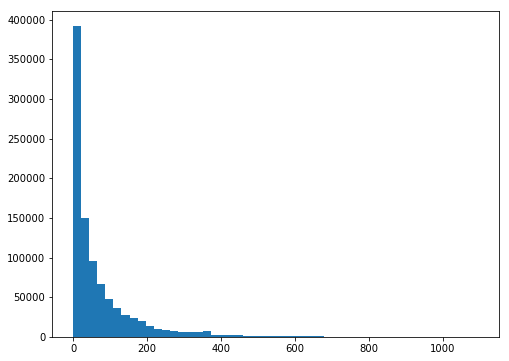

In [28]:
import matplotlib.pyplot as plt
dd = df_train_data2.days_delta_1.values
plt.figure(figsize=(8,6))
plt.hist(dd, bins = 50)
plt.show()

In [7]:
buy_within = 0
if buy_within == 365:
    df_train_data2.to_csv('jun_train_data.csv')
elif buy_within == 180:
    df_train_data2.to_csv('jun_train_data_6months.csv')
elif buy_from == 14 and buy_till == 42:
    df_train_data.to_csv('jun_train_data5_2w6w.csv')